<a href="https://colab.research.google.com/github/njonge-nathan/Medical-Cost-Prediction/blob/main/MedicalCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical Costs Predictions

The project will be a success when we accurately predict the medical cost or insurance cost

##1.0 Importing Libraries

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##2.0 Loading the Dataset

In [2]:
# loading the dataset into our environment
data = pd.read_csv("Medical cost.csv")

## 3.0 Checking the dataset

In [3]:
# checking the number of records
data.shape

(1338, 7)

In [5]:
# previewing the first five records
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# previewing the last five records
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# checking the data types of each column
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# checking info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##4.0 Tidyng the dataset

###Accuracy

In [9]:
# We can describe the data using the describe function to check on our descriptive statistics
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###Completeness

In [10]:
# check for any null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###Consistency

In [11]:
# check if our dataset contains any duplicated values
data.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [12]:
# dropping the duplicates
data = data.drop_duplicates()

In [13]:
# checking if the duplicates have been dropped
data.duplicated().values.any()

False

###Uniformity

In [14]:
# checking our columns for uniformity
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

###Checking for outliers

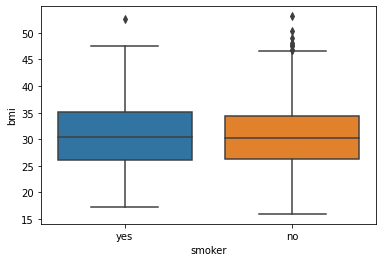

In [16]:
# checking for outliers in the bmi column
sns.boxplot( x=data["smoker"], y=data["bmi"] );
plt.show()

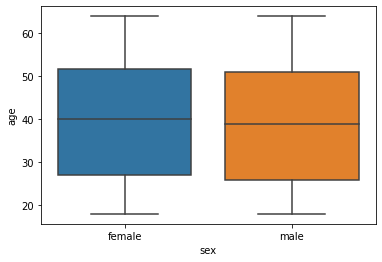

In [17]:
# checking for outliers in the age column
sns.boxplot( x=data["sex"], y=data["age"] );
plt.show()

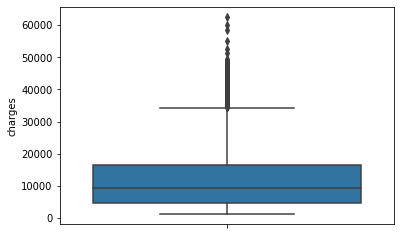

In [40]:
# checking for outliers in the charges column
sns.boxplot( y=data["charges"] );
plt.show()

In [39]:
# removing outliers in the bmi column
data = data[data['bmi'] < 47]

In [42]:
# checking shape of dataset after removing outliers
data.shape

(1328, 7)

##5.0 Exploratory Data Analysis

###Univariate Analysis

####Frequency tables

In [44]:
data['smoker'].value_counts().to_frame()

,smoker
no,1057
yes,271


In [45]:
data['region'].value_counts().to_frame()

,region
southeast,357
southwest,324
northwest,324
northeast,323


In [46]:
data['sex'].value_counts().to_frame()

,sex
male,669
female,659


### Bivariate Analysis

####Frequency Tables

In [37]:
data[['bmi','sex']].groupby('sex').agg(['mean','count'])

bmi      
             mean count
sex                    
female  30.377749   662
male    30.943652   675

In [28]:
data[['age','sex']].groupby('sex').agg(['mean','count'])

age      
             mean count
sex                    
female  39.503021   662
male    38.946667   675

In [34]:
data[['age','region']].groupby('region').agg(['mean','count'])

age      
                mean count
region                    
northeast  39.268519   324
northwest  39.259259   324
southeast  38.939560   364
southwest  39.455385   325

In [36]:
data[['bmi','smoker']].groupby('smoker').agg(['mean','count'])

bmi      
             mean count
smoker                 
no      30.651853  1063
yes     30.708449   274

#### Scatterplot

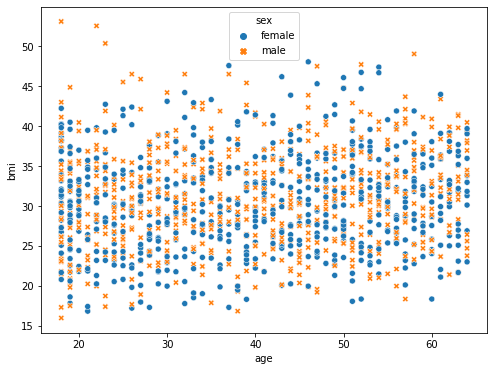

In [23]:
# scatterplot of age vs bmi
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='age', y='bmi', hue='sex', style='sex')

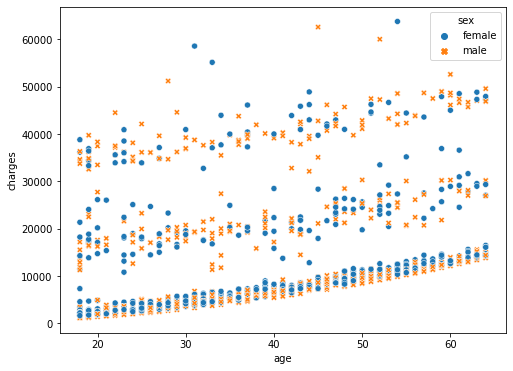

In [26]:
# scatterplot of age vs charges
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='age', y='charges', hue='sex', style='sex')

As the age increases the charges for medical costs also increases

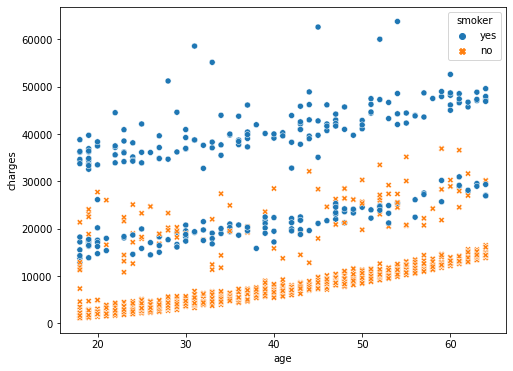

In [38]:
# scatterplot of age vs charges
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', style='smoker')

If a person is a smoker they are likely to incur more charges unlike when a person is not a smoker

##6.0 Solution Implementation

#### Label encoding

In [47]:
# label encode categorical features
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [49]:
# Label Encoding
name_list = ['sex', 'smoker', 'region']

for name in name_list:
  data[name] = label_encoded(data[name])

data.head(3) 

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


#### Correlation

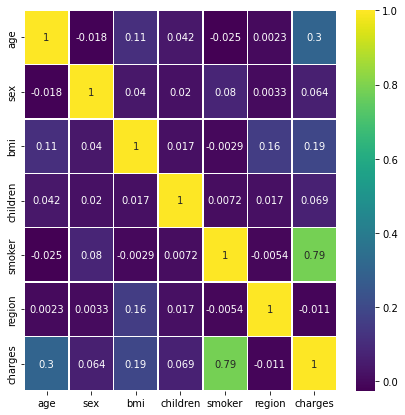

In [50]:
# check for correlation using a heatmap
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

### RandomForestRegressor

In [51]:
# Split the independent and dependent variables
y = data['charges']
X = data.drop(['charges'], axis = 1)

In [52]:
# import the model libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [53]:
# splitting the data into training data and testing data
# Train using 80% of the data.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [54]:
# Building the model
random_model = RandomForestRegressor(n_estimators=250, n_jobs = -1)

In [55]:
#Fit
random_model.fit(Xtrain, ytrain)

# Predict based on the model we've trained
y_pred = random_model.predict(Xtest)

#Checking the training accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

97.77 %


In [56]:
# checking the testing accuracy
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

80.47 %


In [59]:
# Save the trained model as a pickle string.
import pickle 

filename = 'medical_pred_model'
pickle.dump(random_model,open(filename,'wb'))
